In [7]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from sklearn import covariance

import pyfolio as pf

import datetime as dt
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

jtplot.style(figsize=(15, 9))

In [49]:
df = yf.download(['BK', 'BAC'], dt.datetime(2020, 1, 1), dt.datetime.now(), auto_adjust=True)
df.head()

[*********************100%***********************]  2 of 2 completed


Close                  High                   Low             \
                  BAC         BK        BAC         BK        BAC         BK   
Date                                                                           
2020-01-02  32.048061  44.222713  32.066046  44.222713  31.733337  43.614784   
2020-01-03  31.382641  43.658207  31.607445  43.797163  31.256748  43.250023   
2020-01-06  31.337681  44.066391  31.382644  44.075074  30.906057  43.441088   
2020-01-07  31.130854  44.509308  31.400618  44.656947  31.049924  44.022961   
2020-01-08  31.445583  44.561413  31.643409  44.787215  31.067911  44.300868   

                 Open               Volume           
                  BAC         BK       BAC       BK  
Date                                                 
2020-01-02  31.787288  43.823216  37614200  2587200  
2020-01-03  31.454576  43.649520  50357900  2276100  
2020-01-06  30.942027  43.692947  42185000  3978800  
2020-01-07  31.202793  44.022961  34149000  3573500  
2020-01-08  31.085896  44.682999  45311600  3941400

<AxesSubplot:xlabel='Date'>

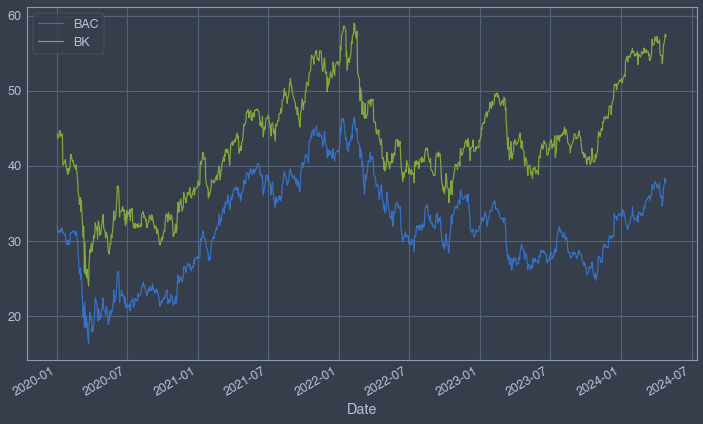

In [50]:
df['Close'].plot()

In [53]:
df[['BAC_std', 'BK_std']] = df['Close'].rolling(window=30).std()

In [56]:
df.head()

Close                  High                   Low             \
                  BAC         BK        BAC         BK        BAC         BK   
Date                                                                           
2020-01-02  32.048061  44.222713  32.066046  44.222713  31.733337  43.614784   
2020-01-03  31.382641  43.658207  31.607445  43.797163  31.256748  43.250023   
2020-01-06  31.337681  44.066391  31.382644  44.075074  30.906057  43.441088   
2020-01-07  31.130854  44.509308  31.400618  44.656947  31.049924  44.022961   
2020-01-08  31.445583  44.561413  31.643409  44.787215  31.067911  44.300868   

                 Open               Volume          BAC_std BK_std  
                  BAC         BK       BAC       BK                 
Date                                                                
2020-01-02  31.787288  43.823216  37614200  2587200     NaN    NaN  
2020-01-03  31.454576  43.649520  50357900  2276100     NaN    NaN  
2020-01-06  30.942027  43.692947  42185000  3978800     NaN    NaN  
2020-01-07  31.202793  44.022961  34149000  3573500     NaN    NaN  
2020-01-08  31.085896  44.682999  45311600  3941400     NaN    NaN

In [61]:
df['BAC_std_up'] = df['Close']['BAC'] + df['BAC_std']
df['BK_std_up'] = df['Close']['BK'] + df['BK_std']
df['BAC_std_bottom'] = df['Close']['BAC'] - df['BAC_std']
df['BK_std_bottom'] = df['Close']['BK'] - df['BK_std']

df['BAC_mean'] = df['Close']['BAC'].rolling(window=30).mean()
df['BK_mean'] = df['Close']['BK'].rolling(window=30).mean()

df['BAC_median'] = df['Close']['BAC'].rolling(window=30).median()
df['BK_median'] = df['Close']['BK'].rolling(window=30).median()

<AxesSubplot:xlabel='Date'>

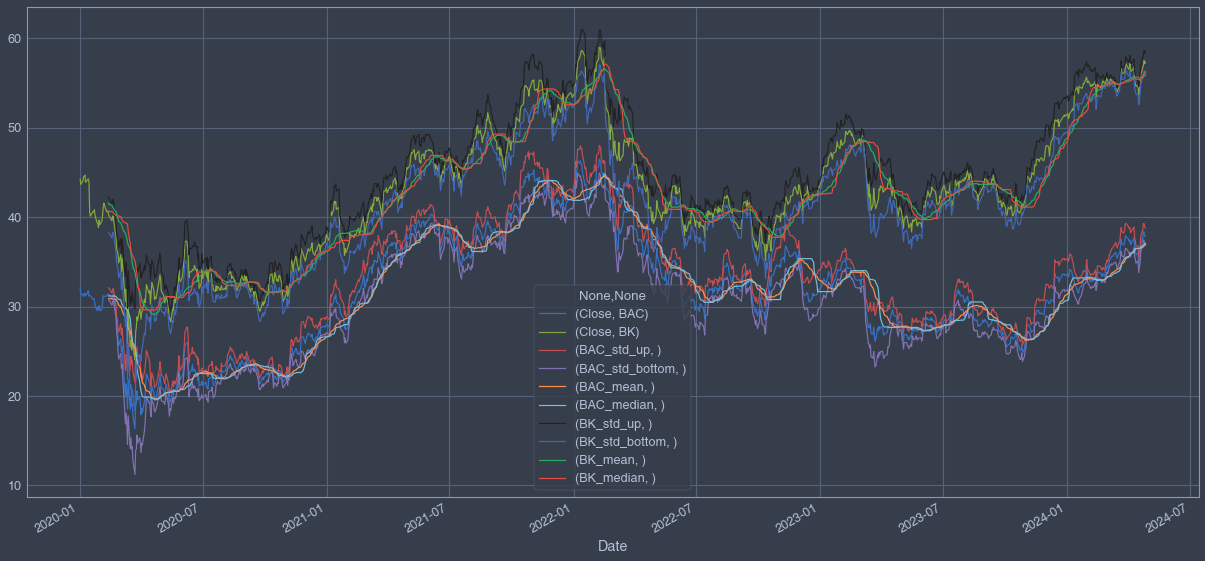

In [64]:
fig, ax = plt.subplots(1, figsize=(21, 10))
df[['Close',
    'BAC_std_up', 'BAC_std_bottom', 'BAC_mean', 'BAC_median',
    'BK_std_up', 'BK_std_bottom', 'BK_mean', 'BK_median']].plot(ax=ax)

<AxesSubplot:xlabel='Date'>

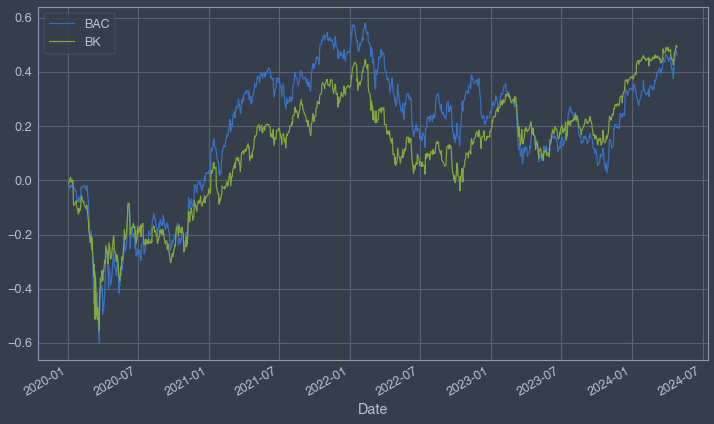

In [70]:
df['Close'].pct_change()[1:].cumsum().plot()

In [68]:
df['Close'].var()

BAC    41.479946
BK     52.956151
dtype: float64

<AxesSubplot:xlabel='Date'>

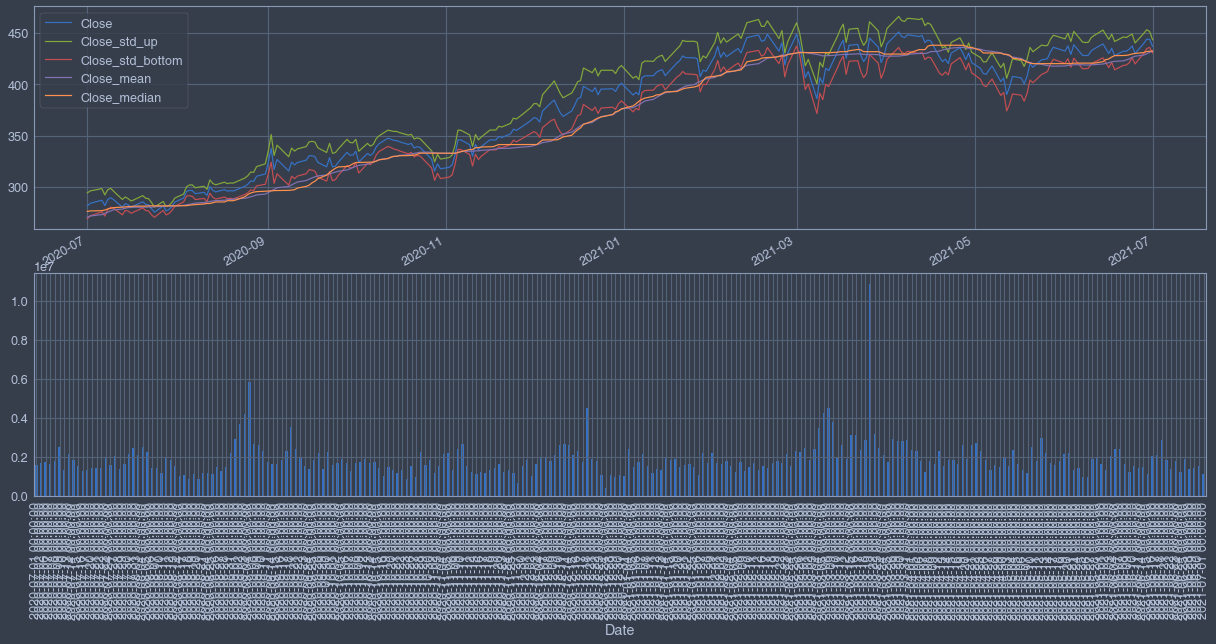

In [48]:
fig, ax = plt.subplots(2, figsize=(21, 10))
df[['Close', 'Close_std_up', 'Close_std_bottom', 'Close_mean', 'Close_median']].loc['2020-07-01':'2021-07-01'].plot(ax=ax[0])
df['Volume'].loc['2020-07-01':'2021-07-01'].plot(kind='bar', ax=ax[1])